## **Лабораторная работа №2**

### **1.1 Оценки математического ожидания, дисперсии, медианы**

**Пусть случайная величина $\xi$ имеет распределение, задаваемое плотностью** $\ f_\xi(x) = \theta^2 x e^{-\theta x}, \quad x > 0.$  **Для каждого $\theta \in \{0.5,\, 2,\, 8\}$:**

**Задание № 1.**

**(а) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$. Привести в отчет.**

$\ f_\xi(x) = \theta^2 x e^{-\theta x} $ - гамма-распределение

Математическое ожидание рассчитывается по формуле:

$E[\xi] = \int_{0}^{\infty} x \cdot \theta^2 x e^{-\theta x} \, dx = \theta^2 \int_{0}^{\infty} x^2 e^{-\theta x} \, dx$

Используем формулу для интеграла:

$ \int_{0}^{\infty} x^n e^{-\lambda x} \ dx = \frac{n!}{\lambda^{n+1}} $

Таким образом, математическое ожидание будет равно:

$ E[\xi] = \theta^2 \cdot \frac{2!}{\theta^3} = \frac{2}{\theta} $

Математическое ожидание квадрата:

$ E[\xi^2] = \int_{0}^{\infty} x^2 \cdot \theta^2 x e^{-\theta x} = \theta^2 \int_{0}^{\infty} x^3 e^{-\theta x} \, dx = \theta^2 \cdot \frac{3!}{\theta^4} = \frac{6}{\theta^2}
$

Дисперсия:

$ \mathbf{D} = E[\xi^2] - (E[\xi])^2 = \frac{6}{\theta^2} - \left(\frac{2}{\theta}\right)^2 = \frac{6}{\theta^2} - \frac{4}{\theta^2} = \frac{2}{\theta^2}$

Результаты для $\theta \in \{0.5,\, 2,\, 8\}$

$
\begin{array}{c|cc}
\theta & E[\xi] & E[\xi^2] & \mathbf{D}\\
\hline
0.5 & 4 & 24 &  8 \\
2 & 1 & 1.5 & 0.5 \\
8 & 0.25 & \frac{3}{32} & \frac{1}{32}\\
\end{array}
$

**(b) Для $k \in \{2^4, 2^5, \dots, 2^{15}\}$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все
на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — k, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.**

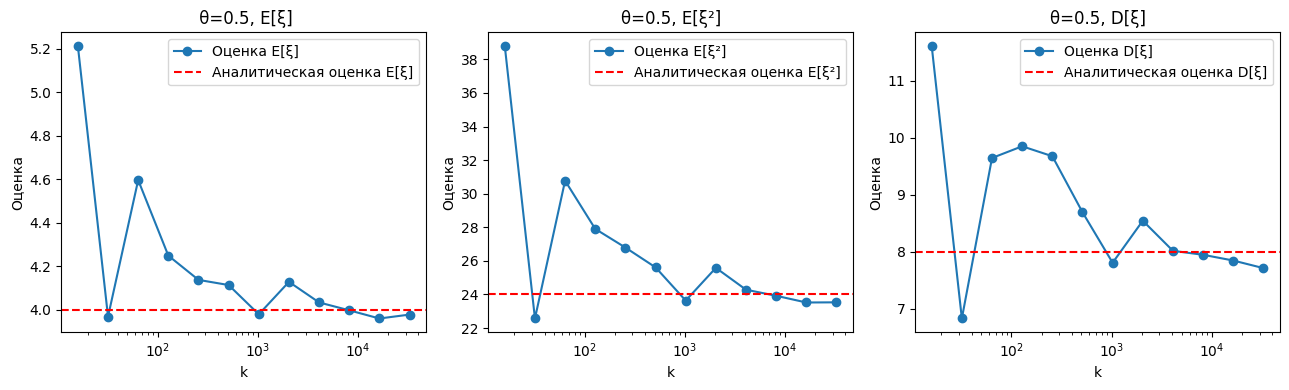

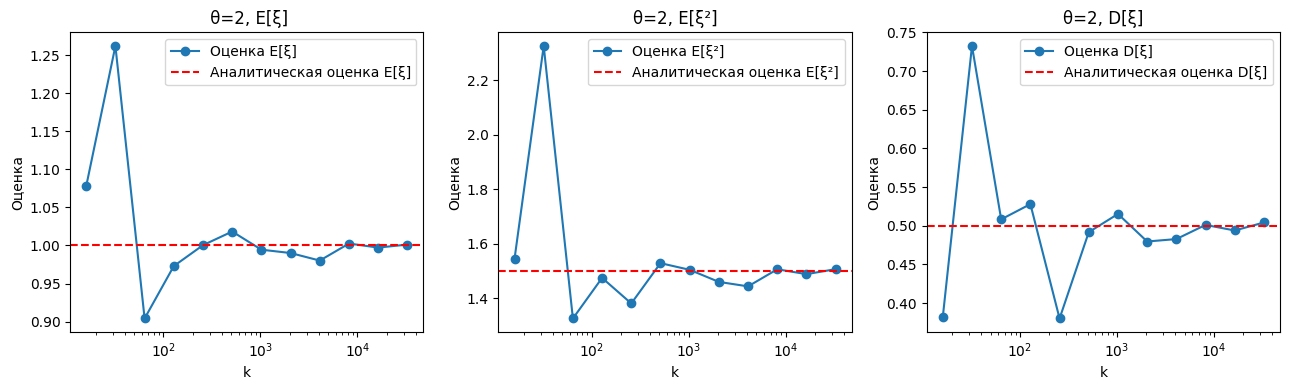

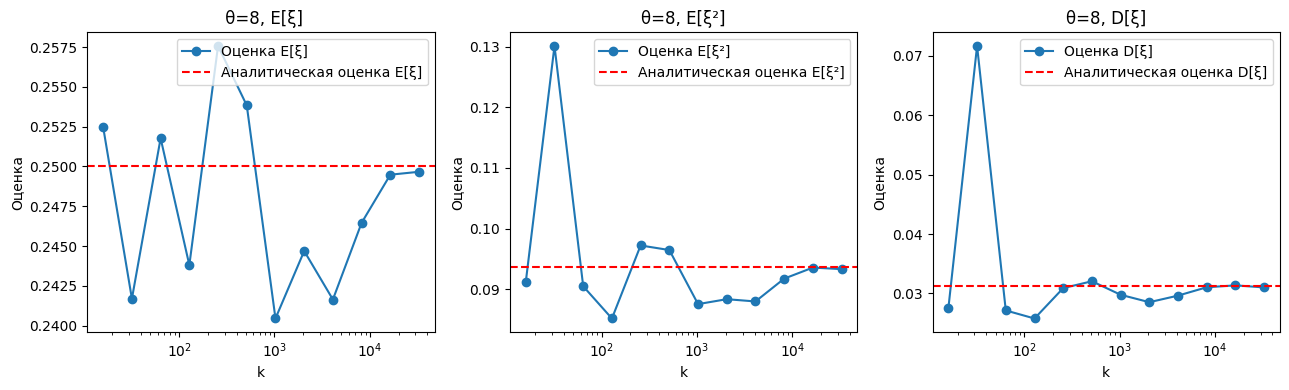

In [ ]:
# Импортируем библиотеки для работы
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Задаем параметры
theta_values = [0.5, 2, 8]
k_values = [2**i for i in range(4, 16)]

# Создаем списки для хранения оценок
for theta in theta_values:
    math_expectation = []
    math_expectation_sq = []
    variance = []

    # Генерируем выборку и получаем оценки
    for k in k_values:
            sample = np.random.gamma(shape=2, scale=1/theta, size=k)
            math_expectation.append(np.mean(sample))
            math_expectation_sq.append(np.mean(sample**2))
            variance.append(np.var(sample))

    # Задаем аналитические значения
    E = 2 / theta
    E_sq = 6 / theta**2
    D = 2 / theta**2

     # Строим графики для оценок математического ожидания E[ξ]
    plt.figure(figsize=(13, 4))
    plt.subplot(1, 3, 1)
    plt.plot(k_values, math_expectation, label='Оценка E[ξ]', marker='o')
    plt.axhline(E, color='red', linestyle='--', label='Аналитическая оценка E[ξ]')
    plt.title(f' θ={theta}, E[ξ]')
    plt.xlabel('k')
    plt.ylabel('Оценка')
    plt.xscale('log')
    plt.legend()

    # Строим графики для оценок квадрата математического ожидания E[ξ²]
    plt.subplot(1, 3, 2)
    plt.plot(k_values, math_expectation_sq, label='Оценка E[ξ²]', marker='o')
    plt.axhline(E_sq, color='red', linestyle='--', label='Аналитическая оценка E[ξ²]')
    plt.title(f'θ={theta}, E[ξ²]')
    plt.xlabel('k')
    plt.ylabel('Оценка')
    plt.xscale('log')
    plt.legend()

    # Строим графики для оценок дисперсии D[ξ]
    plt.subplot(1, 3, 3)
    plt.plot(k_values, variance, label='Оценка D[ξ]', marker='o')
    plt.axhline(D, color='red', linestyle='--', label='Аналитическая оценка D[ξ]')
    plt.title(f'θ={theta}, D[ξ]')
    plt.xlabel('k')
    plt.ylabel('Оценка')
    plt.xscale('log')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Задание №2**

**Дана плотность распределения случайной величины $\xi$:**

$$
f_\xi^{\lambda, a}(x) =
\begin{cases}
\lambda e^{-\lambda (x-a)}, & x \geqslant a \\
0, & \text{else}
\end{cases}
$$

Пусть $(\lambda, a) = (2, 2)$

**(a) Аналитически вычислите значение моды, математического ожидания и медианы.**

Мода:

Мода - значение, для которого плотность вероятности $f_{\xi}(x)$ достигает максимума.

Плотность $f_\xi(x) = 2e^{-2(x-2)}$ является монотонно убывающей (т.к. $-2(x-2)\leq 0\ $ при условии, что $ \ x \geqslant a $). Поэтому, $ M = a = 2$.

Математическое ожидание:

$ E[\xi] = \int_2^{\infty} 2 x  e^{-2 (x - 2)} \ dx $

Пусть $ x-2 = u $, тогда:

$ E[\xi] = \int_0^{\infty} 2 \cdot (u+2)  e^{-2u} \ du = 2 \int_0^{\infty} ue^{-2u} du + 4   \int_0^{\infty} e^{-2u} du = 2 \cdot \frac{1}{4} + 4\cdot \frac{1}{2} = 2.5 $

Медиана:

Медиана случайной величины $ Me[\xi] = 0.5 $, или можно записать как функция распределения $F(Me) = 0.5$

$ F(x) = 1 - e^{-\lambda(x-a)} $

$ 1 - e^{-2 (me - 2)}= 0.5 $

$ e^{-2 (me - 2)}= 0.5 $

$ -2me + 4 = -\ln(2) $

$ me = \frac{1}{2} \cdot \ln(2) + 2 \approx 2.346 $

$ Me \approx 2.346 $


**(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического жидания и медианы.**

In [8]:
# Импортируем библиотеки для работы
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

lambda_p = 2
a_p = 2

# Задаем аналитические значения
analitic_mode = 2
analitic_mean = 2.5
analitic_median = 2 + np.log(2) / 2

# Генерируем большую и маленькую выборки из сдвинутого экспоненциального распределения с параметрами (λ,a)
large_sample = np.random.exponential(scale=1/lambda_p, size=10000) + a_p
small_sample = np.random.exponential(scale=1/lambda_p, size=20) + a_p

# Вычисляем оценки моды, математического ожидания и медианы
def estimates(sample):
    mode = np.min(sample)
    mean = np.mean(sample)
    median = np.median(sample)
    return mode, mean, median

large_mode, large_mean, large_median = estimates(large_sample)
small_mode, small_mean, small_median = estimates(small_sample)

print(f"Аналитические значения:")
print(f"Мода:{analitic_mode}")
print(f"Математическое ожидание:{analitic_mean}")
print(f"Медиана:{analitic_median:.3f}")

print(f"\nОценки для большой выборки:")
print(f"Мода:{large_mode:.3f}")
print(f"Математическое ожидание:{large_mean:.3f}")
print(f"Медиана:{large_median:.3f}")

print(f"\nОценки для маленько выборки:")
print(f"Мода:{small_mode:.3f}")
print(f"Математическое ожидание:{small_mean:.3f}")
print(f"Медиана:{small_median:.3f}")

Аналитические значения:
Мода:2
Математическое ожидание:2.5
Медиана:2.347

Оценки для большой выборки:
Мода:2.000
Математическое ожидание:2.501
Медиана:2.347

Оценки для маленько выборки:
Мода:2.013
Математическое ожидание:2.439
Медиана:2.307


**(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и анали-
тическими значениями мод, математического жидания и медианы. То же самое, для второй.**

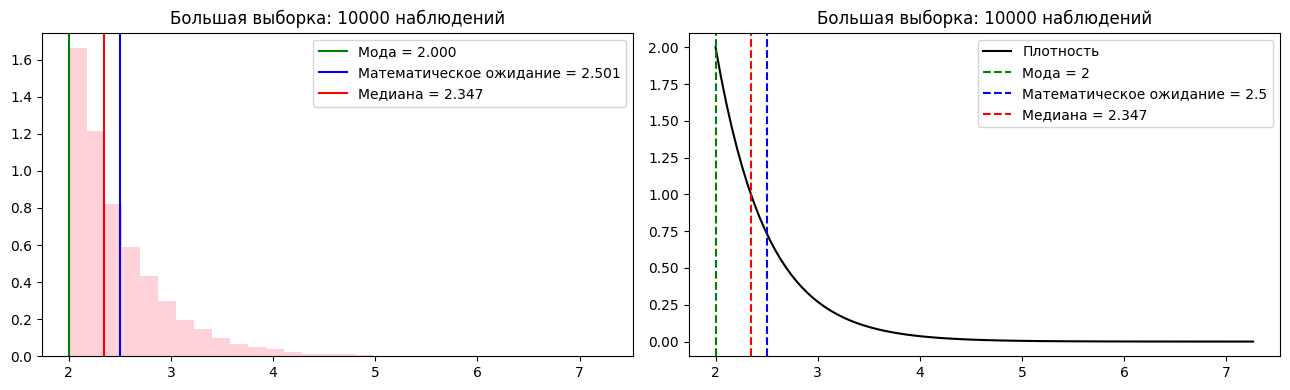

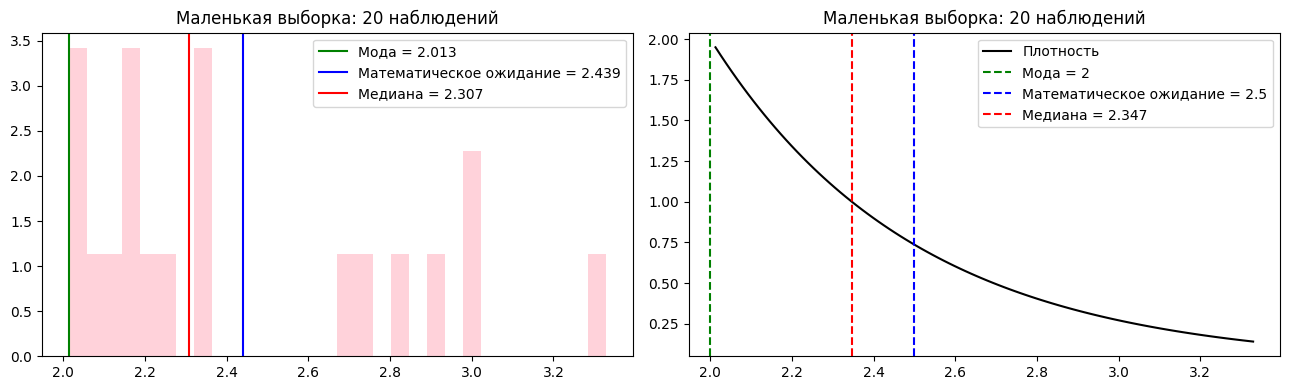

In [9]:
# Функция для построения графиков
def sample_graphs(title, sample, mode, mean, median, analitic_mode, analitic_mean, analitic_median):
    plt.figure(figsize=(13, 4))

    # График с оценками
    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=30, density=True, alpha=0.7, color='pink')

    plt.axvline(mode, color='green', linestyle='solid', label=f'Мода = {mode:.3f}')
    plt.axvline(mean, color='blue', linestyle='solid', label=f'Математическое ожидание = {mean:.3f}')
    plt.axvline(median, color='red', linestyle='solid', label=f'Медиана = {median:.3f}')
    plt.title(title)
    plt.legend()

    # График с функцией распределения плотности и аналитическими значениями
    plt.subplot(1, 2, 2)
    x = np.linspace(min(sample), max(sample), 100)

    plt.plot(x, 2 * np.exp(-2 * (x - 2)), color='k', label='Плотность')

    plt.axvline(analitic_mode, color='green', linestyle='dashed', label=f'Мода = {analitic_mode}')
    plt.axvline(analitic_mean, color='blue', linestyle='dashed', label=f'Математическое ожидание = {analitic_mean}')
    plt.axvline(analitic_median, color='red', linestyle='dashed', label=f'Медиана = {analitic_median:.3f}')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()

sample_graphs('Большая выборка: 10000 наблюдений', large_sample, large_mode, large_mean, large_median, analitic_mode, analitic_mean, analitic_median)
sample_graphs('Маленькая выборка: 20 наблюдений', small_sample, small_mode, small_mean, small_median, analitic_mode, analitic_mean, analitic_median)

**(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.**

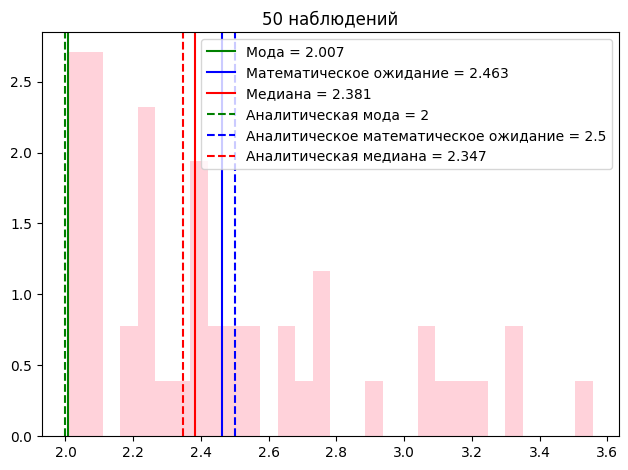

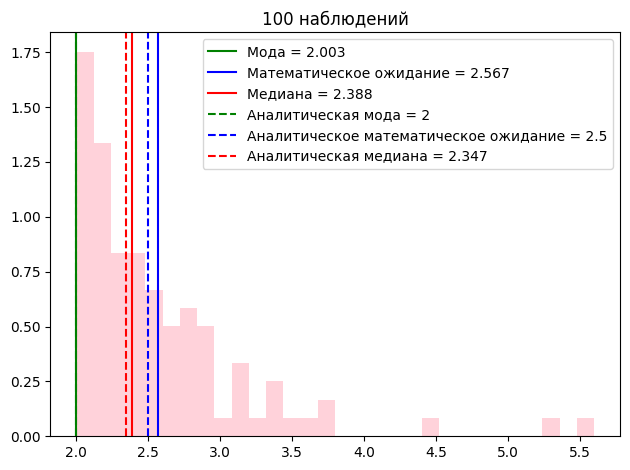

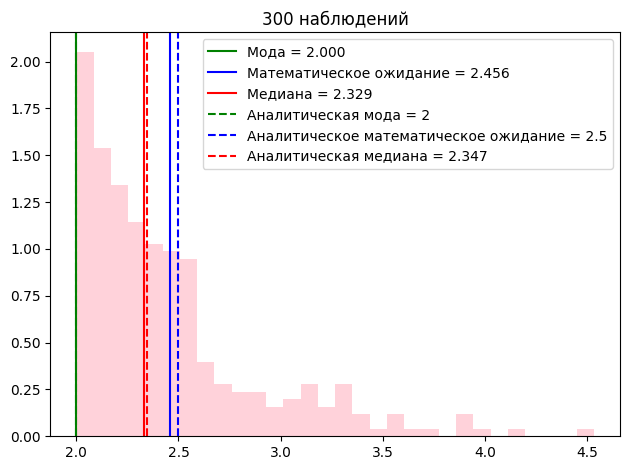

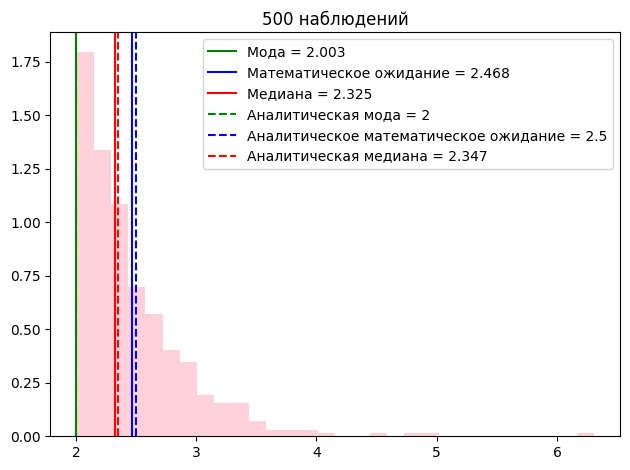

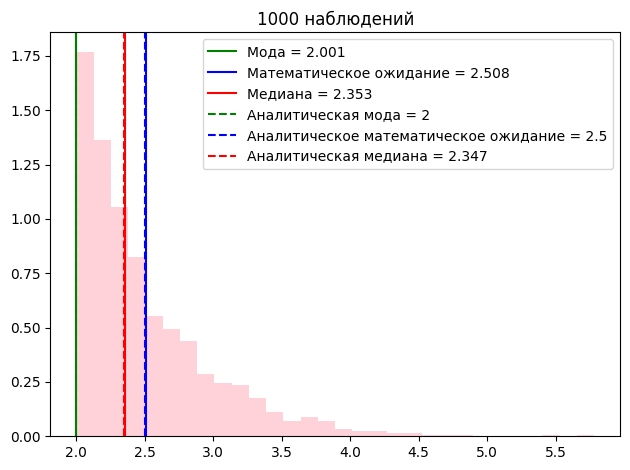

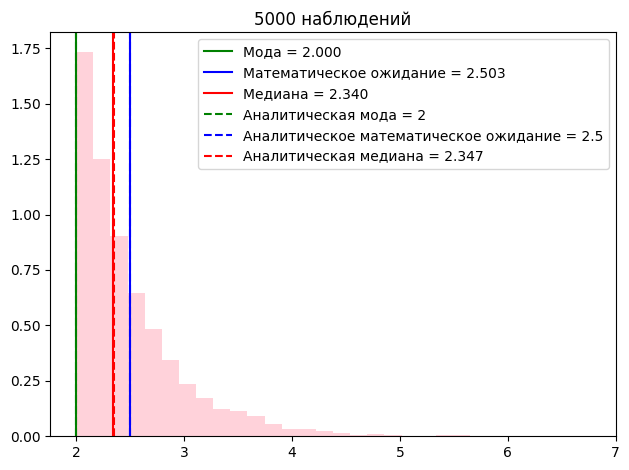

In [18]:
def sample_graphs_sizes(title, sample, mode, mean, median, analitic_mode, analitic_mean, analitic_median):

    plt.hist(sample, bins=30, density=True, alpha=0.7, color='pink')

    plt.axvline(mode, color='green', linestyle='solid', label=f'Мода = {mode:.3f}')
    plt.axvline(mean, color='blue', linestyle='solid', label=f'Математическое ожидание = {mean:.3f}')
    plt.axvline(median, color='red', linestyle='solid', label=f'Медиана = {median:.3f}')

    plt.axvline(analitic_mode, color='green', linestyle='dashed', label=f'Аналитическая мода = {analitic_mode}')
    plt.axvline(analitic_mean, color='blue', linestyle='dashed', label=f'Аналитическое математическое ожидание = {analitic_mean}')
    plt.axvline(analitic_median, color='red', linestyle='dashed', label=f'Аналитическая медиана = {analitic_median:.3f}')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()

size_values = [50, 100, 300, 500, 1000, 5000]
for size in size_values:
    selection = np.random.exponential(scale=1/lambda_p, size=size) + a_p
    sel_mode, sel_mean, sel_median = estimates(selection)
    sample_graphs_sizes(f'{size} наблюдений', selection, sel_mode, sel_mean, sel_median, analitic_mode, analitic_mean, analitic_median)


Можно заметить, что с увеличением размера выборки оценки математического ожидания и медианы сходятся с аналитическими значениями. Но медиана не сходится к математическому ожиданию.

### **1.2 Моделирование совместного распределения двух СВ**

**Пусть совместное распределение двух случайных величин задано таблицей:**

$
\begin{array}{c|cc}
\ \xi \backslash \eta & 1 & 2 & 3 & ...\\
\hline
-1 & \frac{2}{5} \cdot \frac{1}{2^1} & \frac{2}{5} \cdot \frac{1}{2^2} &  \frac{2}{5} \cdot \frac{1}{2^3} & ... \\
0 & \frac{1}{5} \cdot \frac{1}{2^1} & \frac{1}{5} \cdot \frac{1}{2^2} & \frac{1}{5} \cdot \frac{1}{2^3} & ... \\
1 & \frac{2}{5} \cdot \frac{1}{2^1} & \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & ...\\
\end{array}
$

где $\eta$ принимает все значения из $ ℕ $. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

1. Рассчитаем маргинальные распределения $\xi$ и $\eta$

Для $\eta$:

$ P(\eta = n) = (\frac{2}{5} + \frac{1}{5} + \frac{2}{5}) \cdot \frac{1}{2^n} =  1 \cdot \frac{1}{2^n}$, где $ n = 1,2,3..$

Для $\xi$:

$ P(\xi = -1) = \frac{2}{5} \sum_{n=1}^{\infty} \frac{1}{2^n} =  \frac{2}{5}$

$ P(\xi = 0) = \frac{1}{5}$

$ P(\xi = 1) = \frac{2}{5} $

2. Рассчитаем математическое ожидание:

$ E[\eta] = \sum_{n=1}^{\infty} n \cdot \frac{1}{2^n} = 2$

$ E[\xi] = (-1) \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0 $

$\mathsf{E}[\xi \eta] = 0 $

3. Рассчитываем дисперсию

Для $\eta$:

$ D[\eta] = E[\eta^2] - (E[\eta])^2$

$E[\eta^2] = \sum_{n=1}^{\infty} n^2 \cdot \frac{1}{2^n} = 6 $

$ D[\eta] = 6 - 4 = 2$

Для $\xi$:

$ D[\eta] = E[\eta^2] - (E[\eta])^2 $

$E[\eta^2] = (-1)^2 \cdot \frac{2}{5} + 0^2 \cdot \frac{1}{5} + 1^2 \cdot \frac{2}{5} = \frac{4}{5}$

$ D[\eta] = \frac{4}{5} - 0^2 = \frac{4}{5} $

4. Рассчитываем ковариацию

$ \text{Cov}(\xi, \eta) = \mathsf{E}(\xi \eta) - \mathsf{E}\xi \ \mathsf{E}\eta $

$ \text{Cov}(\xi, \eta) =  0 - 0 \cdot 2 = 0 $

5. Корреляционная матрица

$ \rho(\xi, \eta) = \frac{\text{Cov}(\xi, \eta)}{\sqrt{\mathbf{D}\xi} \sqrt{\mathbf{D}\eta}} $

$ \rho(\xi, \eta) = 0 $

Таким образом, корреляционная матрица будет иметь вид:

$
\Sigma(\xi, \eta) = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$

Вычислим корреляционную матрицу на основе моделирования

In [54]:
# Функция для вычисления корреляционной матрицы
def correlation_matrix_calc(n_sample):
    # Генерируем выборки
    eta_sample = np.random.geometric(p=0.5, size = n_sample)
    xi_choices = [-1, 0, 1]
    xi_probabilities = [2/5, 1/5, 2/5]
    xi_sample = np.random.choice(xi_choices, size = n_sample, p = xi_probabilities)
    # Математическое ожидание
    mean_eta = np.mean(eta_sample)
    mean_xi = np.mean(xi_sample)
    # Дисперсия
    d_xi = np.var(xi_sample)
    d_eta = np.var(eta_sample)
    # Ковариационная матрица
    covariation_matrix = np.cov(xi_sample, eta_sample)
    cov = covariation_matrix[0][1]
    # Корреляционная матрица
    correlation_matrix = np.ones((2, 2))
    correlation_matrix[0, 1] = cov / (np.sqrt(d_eta) * np.sqrt(d_xi))
    correlation_matrix[1, 0] = correlation_matrix[0, 1]
    return correlation_matrix, covariation_matrix

correlation_matrix, covariation_matrix = correlation_matrix_calc(10000)
print("Корреляционная матрица:")
print(correlation_matrix)

Корреляционная матрица:
[[1.         0.00684597]
 [0.00684597 1.        ]]
